In [32]:
import pandas as pd

df = pd.read_csv('data/kbo_한화_관중수.csv')

In [33]:
df

,경기수,날짜,요일,홈,방문,구장,관중수,승패
0,1,03월 29일,금,한화,KT,대전,"12,000",1
1,2,03월 30일,토,한화,KT,대전,"12,000",1
2,3,03월 31일,일,한화,KT,대전,"12,000",1
3,4,04월 02일,화,한화,롯데,대전,"12,000",0
4,5,04월 04일,목,한화,롯데,대전,"12,000",1
...,...,...,...,...,...,...,...,...
64,67,09월 22일,일,한화,롯데,대전,"12,000",1
65,68,09월 23일,월,한화,롯데,대전,"10,407",0
66,69,09월 27일,금,한화,KIA,대전,"12,000",1
67,70,09월 28일,토,한화,SSG,대전,"12,000",0


In [34]:
df = df[['날짜','관중수','승패']]

In [35]:
# '관중수' 컬럼의 쉼표 제거하고, 숫자형으로 변환
df['관중수'] = df['관중수'].replace({',': ''}, regex=True).astype(float)

C:\Users\82102\AppData\Local\Temp\ipykernel_27140\3363018191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['관중수'] = df['관중수'].replace({',': ''}, regex=True).astype(float)


In [36]:
# 1. '날짜' 형식을 '2024-03-29'로 변환 (2024년을 넣어줍니다)
df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2', regex=True)

# 2. 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

C:\Users\82102\AppData\Local\Temp\ipykernel_27140\3672805262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2', regex=True)
C:\Users\82102\AppData\Local\Temp\ipykernel_27140\3672805262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')


In [23]:
df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2')

C:\Users\82102\AppData\Local\Temp\ipykernel_27140\1370510748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2')


In [37]:
df

,날짜,관중수,승패
0,2024-03-29,12000.0,1
1,2024-03-30,12000.0,1
2,2024-03-31,12000.0,1
3,2024-04-02,12000.0,0
4,2024-04-04,12000.0,1
...,...,...,...
64,2024-09-22,12000.0,1
65,2024-09-23,10407.0,0
66,2024-09-27,12000.0,1
67,2024-09-28,12000.0,0


In [38]:
correlation_matrix = df.corr()

In [41]:
# 상관계수 출력
print(correlation_matrix)

           날짜       관중수        승패
날짜   1.000000 -0.085026 -0.091064
관중수 -0.085026  1.000000 -0.081445
승패  -0.091064 -0.081445  1.000000


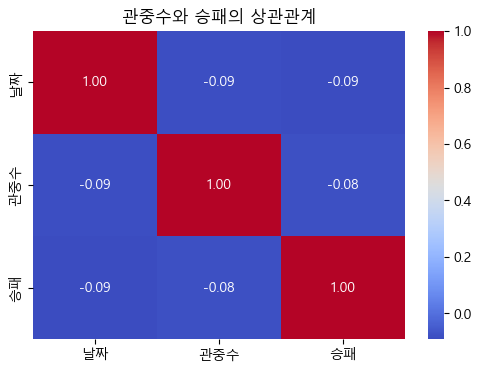

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' 

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# 타이틀 설정
plt.title('관중수와 승패의 상관관계')

# 그래프 출력
plt.show()

In [42]:
df.to_csv('data/관중수.csv')